### Importation des modules nécessaire

In [40]:
import pandas as pd
import numpy as np
from numpy import vstack
from numpy import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import random_split
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_
from sklearn.model_selection import train_test_split
from torch import Tensor
from tqdm import tqdm
import os
import torch
import random
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Importation du dataSet

In [41]:
df = pd.read_csv('C:/Users/PC/Lab1/prices-split-adjusted.csv', delimiter=',', date_parser=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6708\814841128.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('C:/Users/PC/Lab1/prices-split-adjusted.csv', delimiter=',', date_parser=True)


### EDA

In [42]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [44]:
df['date'] = pd.to_datetime(df['date'])

In [45]:
#afficher les statistiques de la dataset
df.describe()


,date,open,close,low,high,volume
count,851264,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,2013-07-21 02:56:29.294037760,64.993618,65.011913,64.336541,65.639748,5.415113e+06
min,2010-01-04 00:00:00,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,2011-10-19 00:00:00,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,2013-08-02 00:00:00,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,2015-04-24 00:00:00,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,2016-12-30 00:00:00,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08
std,NaN,75.203893,75.201216,74.459518,75.906861,1.249468e+07


In [46]:
#vérifier si il y a des valeurs nulls 
df.isna().sum() # y a aucune valeur null 

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [47]:
#Afficher le contenu de la colonne 'symbol'
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [48]:
#combien de lignes et de colonnes
print(f' il y a {df.shape[0]} ligne et {df.shape[1]} colonne ')

 il y a 851264 ligne et 7 colonne 


In [49]:
# Max et Min time 
max_date = df['date'].max()
min_date = df['date'].min()
print(f"From date: {min_date} to date: {max_date}")

From date: 2010-01-04 00:00:00 to date: 2016-12-30 00:00:00


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


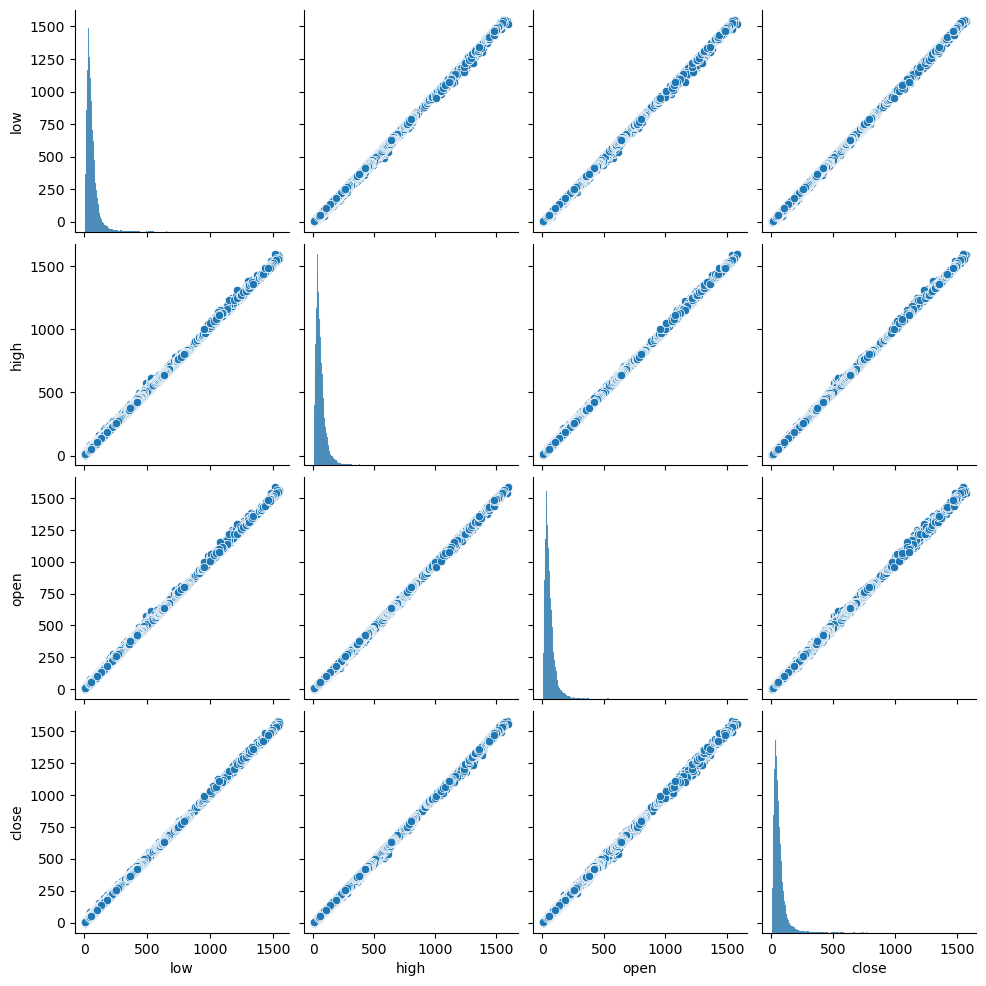

In [50]:
#Afficher la relation entre les variables
sns.pairplot(df[['low', 'high', 'open', 'close']])
plt.show()

In [51]:
len(df)

851264

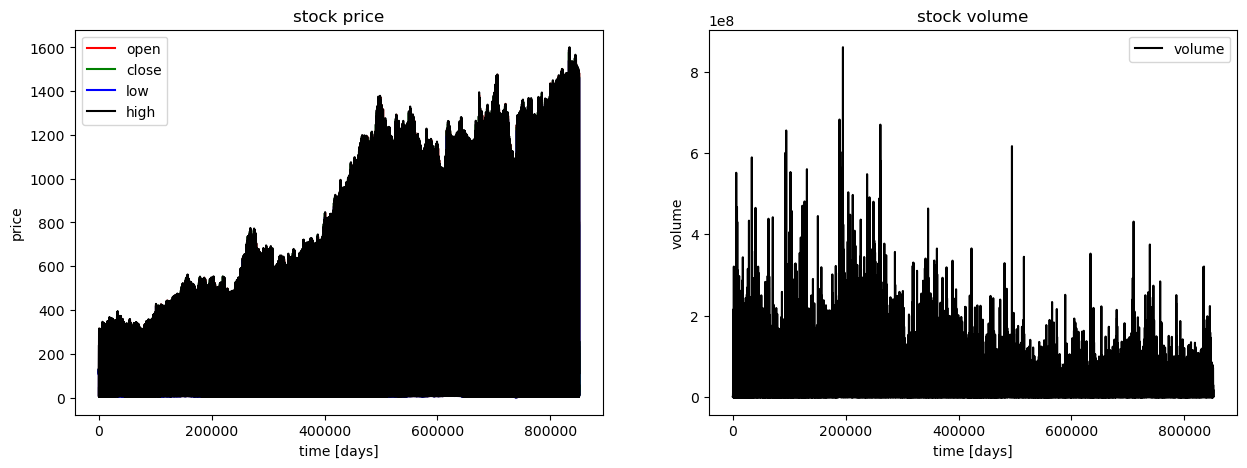

In [52]:
#Visualisation  des données
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df.open.values, color='red', label='open')
plt.plot(df.close.values, color='green', label='close')
plt.plot(df.low.values, color='blue', label='low')
plt.plot(df.high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df.volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [53]:
#Calculons la matrice de corrélation de notre dataset 
#selectionner juste les colonnes qui ont des valeurs numérique
df = df.select_dtypes('float')
# df.head()
#matrice de corrélation 
df.corr()

,open,close,low,high,volume
open,1.000000,0.999845,0.999914,0.999928,-0.132526
close,0.999845,1.000000,0.999926,0.999925,-0.132675
low,0.999914,0.999926,1.000000,0.999889,-0.133087
high,0.999928,0.999925,0.999889,1.000000,-0.132168
volume,-0.132526,-0.132675,-0.133087,-0.132168,1.000000


Text(0.5, 1.0, 'Matrice de corrélation entre features et target')

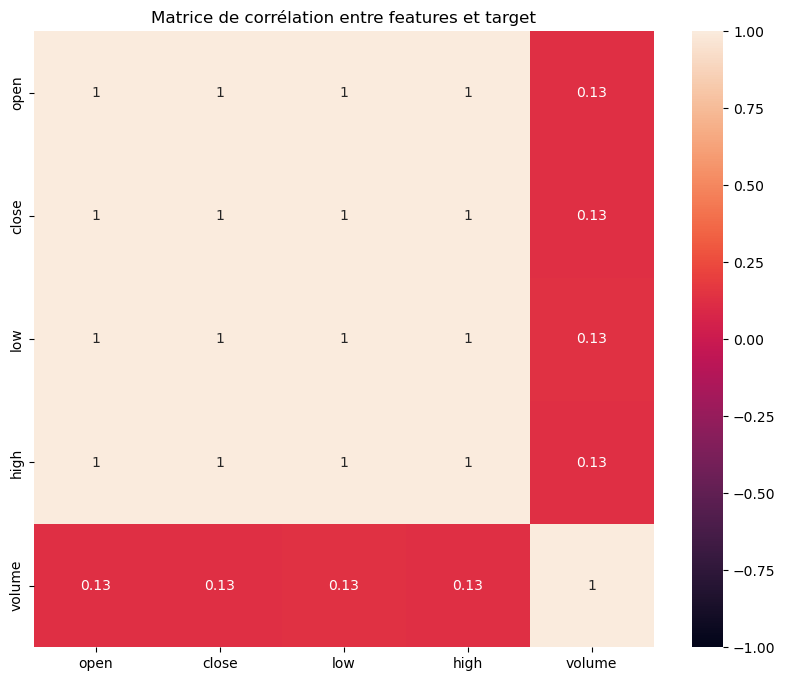

In [54]:
#visualiser la matrice de corrélation en utilisant la fonction 'heatmap' de seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().abs(), vmin=-1, vmax=1, annot=True)
plt.title('Matrice de corrélation entre features et target')

In [55]:
#Vérifier les colonnes du DataSet
df.columns

Index(['open', 'close', 'low', 'high', 'volume'], dtype='object')

In [56]:
#renommer la colonne 'close'
df['Price'] = df['close']

In [57]:
df.head()

,open,close,low,high,volume,Price
0,123.430000,125.839996,122.309998,126.250000,2163600.0,125.839996
1,125.239998,119.980003,119.940002,125.540001,2386400.0,119.980003
2,116.379997,114.949997,114.930000,119.739998,2489500.0,114.949997
3,115.480003,116.620003,113.500000,117.440002,2006300.0,116.620003
4,117.010002,114.970001,114.089996,117.330002,1408600.0,114.970001


In [58]:
df = df.drop('close', axis=1)

In [59]:
df = df.drop('volume', axis=1)

In [60]:
df.head()

,open,low,high,Price
0,123.430000,122.309998,126.250000,125.839996
1,125.239998,119.940002,125.540001,119.980003
2,116.379997,114.930000,119.739998,114.949997
3,115.480003,113.500000,117.440002,116.620003
4,117.010002,114.089996,117.330002,114.970001


In [61]:
# Download df
df.to_csv('C:\\Users\\PC\\Downloads\\prix.csv', index=True)

In [78]:
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path)
        
        df.head()
        # store the inputs and outputs
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        # ensure target has the right shape
        self.y = self.y.reshape((len(self.y), 1))
 
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)
 
    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
 
    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

In [79]:
# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 4)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()
        # second hidden layer
        self.hidden2 = Linear(4, 16)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()
        # third hidden layer
        self.hidden3 = Linear(16, 32)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()
        # fourth hidden layer
        self.hidden4 = Linear(32, 64)
        xavier_uniform_(self.hidden4.weight)
        self.act4 = Sigmoid()
        # fifth hidden layer
        self.hidden5 = Linear(64, 8)
        xavier_uniform_(self.hidden5.weight)
        self.act5 = Sigmoid()
        # sixth hidden layer and output
        self.hidden6 = Linear(8, 1)
        xavier_uniform_(self.hidden6.weight)
 
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer 
        X = self.hidden3(X)
        X = self.act3(X)
        # fourth hidden layer
        X = self.hidden4(X)
        X = self.act4(X)
        # fifth hidden layer
        X = self.hidden5(X)
        X = self.act5(X)
        # sixth hidden layer and output
        X = self.hidden6(X)
        return X

In [85]:
# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    
   
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=25, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl
# train the model
def train_model(train_dl, model):
    size = len(train_dl)
    losses = []
    # define the optimization
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.99)
    # enumerate epochs
    # enumerate epochs
    for epoch in tqdm(range(50),desc='Training Epochs'):
        print(f"Epoch {epoch+1}\n-------------------------------")
        # enumerate mini batches
        for batch, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()
           
            #if batch % 100 == 0:
        loss, current = loss.item(), batch * len(inputs)
        losses.append(loss)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [86]:
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    
    for inputs, targets in test_dl:  # Iterate over batches
        # evaluate the model on the test set
        yhat = model(inputs)
        
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        
        # store
        predictions.append(yhat)
        actuals.append(actual)
    
    predictions, actuals = vstack(predictions), vstack(actuals)
    
    # calculate mse
    mse = mean_squared_error(actuals, predictions)
    
    return mse




In [87]:
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

In [88]:
path = 'C://Users//PC//Downloads//prix.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(3)
# train the model
train_model(train_dl, model)


570347 280917


Training Epochs:   0%|                                                                          | 0/50 [00:00<?, ?it/s]

Epoch 1
-------------------------------


Training Epochs:   2%|█▎                                                              | 1/50 [01:33<1:16:04, 93.15s/it]

loss: 2647.392822  [501886/22814]
Epoch 2
-------------------------------


Training Epochs:   4%|██▌                                                             | 2/50 [03:14<1:18:17, 97.87s/it]

loss: 2596.278320  [501886/22814]
Epoch 3
-------------------------------


Training Epochs:   6%|███▊                                                           | 3/50 [04:59<1:19:23, 101.35s/it]

loss: 589.166809  [501886/22814]
Epoch 4
-------------------------------


Training Epochs:   8%|█████                                                          | 4/50 [06:51<1:20:44, 105.32s/it]

loss: 4638.583008  [501886/22814]
Epoch 5
-------------------------------


Training Epochs:  10%|██████▎                                                        | 5/50 [08:44<1:21:13, 108.30s/it]

loss: 4974.066895  [501886/22814]
Epoch 6
-------------------------------


Training Epochs:  12%|███████▌                                                       | 6/50 [10:29<1:18:25, 106.94s/it]

loss: 2659.353027  [501886/22814]
Epoch 7
-------------------------------


Training Epochs:  14%|████████▊                                                      | 7/50 [12:06<1:14:27, 103.90s/it]

loss: 3399.314209  [501886/22814]
Epoch 8
-------------------------------


Training Epochs:  16%|██████████                                                     | 8/50 [13:43<1:11:09, 101.65s/it]

loss: 3965.108398  [501886/22814]
Epoch 9
-------------------------------


Training Epochs:  18%|███████████▎                                                   | 9/50 [15:21<1:08:37, 100.42s/it]

loss: 1249.496094  [501886/22814]
Epoch 10
-------------------------------


Training Epochs:  20%|████████████▌                                                  | 10/50 [16:57<1:06:00, 99.00s/it]

loss: 2739.947021  [501886/22814]
Epoch 11
-------------------------------


Training Epochs:  22%|█████████████▊                                                 | 11/50 [18:33<1:03:46, 98.11s/it]

loss: 5326.444824  [501886/22814]
Epoch 12
-------------------------------


Training Epochs:  24%|███████████████                                                | 12/50 [20:09<1:01:49, 97.62s/it]

loss: 3707.397461  [501886/22814]
Epoch 13
-------------------------------


Training Epochs:  26%|████████████████▍                                              | 13/50 [21:50<1:00:51, 98.70s/it]

loss: 1088.235596  [501886/22814]
Epoch 14
-------------------------------


Training Epochs:  28%|██████████████████▏                                              | 14/50 [22:39<50:06, 83.52s/it]

loss: 1256.944092  [501886/22814]
Epoch 15
-------------------------------


Training Epochs:  30%|███████████████████▌                                             | 15/50 [23:25<42:04, 72.13s/it]

loss: 2502.161377  [501886/22814]
Epoch 16
-------------------------------


Training Epochs:  32%|████████████████████▊                                            | 16/50 [24:10<36:18, 64.06s/it]

loss: 5649.440918  [501886/22814]
Epoch 17
-------------------------------


Training Epochs:  34%|██████████████████████                                           | 17/50 [25:03<33:22, 60.70s/it]

loss: 2777.267578  [501886/22814]
Epoch 18
-------------------------------


Training Epochs:  36%|███████████████████████▍                                         | 18/50 [25:53<30:45, 57.68s/it]

loss: 3045.385254  [501886/22814]
Epoch 19
-------------------------------


Training Epochs:  38%|████████████████████████▋                                        | 19/50 [26:54<30:15, 58.55s/it]

loss: 5250.920410  [501886/22814]
Epoch 20
-------------------------------


Training Epochs:  40%|██████████████████████████                                       | 20/50 [28:35<35:34, 71.15s/it]

loss: 36570.960938  [501886/22814]
Epoch 21
-------------------------------


Training Epochs:  42%|███████████████████████████▎                                     | 21/50 [30:17<38:51, 80.41s/it]

loss: 3488.433594  [501886/22814]
Epoch 22
-------------------------------


Training Epochs:  44%|████████████████████████████▌                                    | 22/50 [31:53<39:47, 85.25s/it]

loss: 1906.522705  [501886/22814]
Epoch 23
-------------------------------


Training Epochs:  46%|█████████████████████████████▉                                   | 23/50 [33:29<39:51, 88.56s/it]

loss: 4045.142822  [501886/22814]
Epoch 24
-------------------------------


Training Epochs:  48%|███████████████████████████████▏                                 | 24/50 [35:05<39:17, 90.67s/it]

loss: 4171.268555  [501886/22814]
Epoch 25
-------------------------------


Training Epochs:  50%|████████████████████████████████▌                                | 25/50 [36:43<38:39, 92.79s/it]

loss: 5660.025391  [501886/22814]
Epoch 26
-------------------------------


Training Epochs:  52%|█████████████████████████████████▊                               | 26/50 [38:20<37:41, 94.23s/it]

loss: 14334.608398  [501886/22814]
Epoch 27
-------------------------------


Training Epochs:  54%|███████████████████████████████████                              | 27/50 [39:57<36:24, 94.99s/it]

loss: 2377.643799  [501886/22814]
Epoch 28
-------------------------------


Training Epochs:  56%|████████████████████████████████████▍                            | 28/50 [41:42<35:53, 97.90s/it]

loss: 16397.845703  [501886/22814]
Epoch 29
-------------------------------


Training Epochs:  58%|█████████████████████████████████████                           | 29/50 [43:29<35:14, 100.68s/it]

loss: 1526.786621  [501886/22814]
Epoch 30
-------------------------------


Training Epochs:  60%|███████████████████████████████████████                          | 30/50 [45:07<33:16, 99.83s/it]

loss: 8037.641113  [501886/22814]
Epoch 31
-------------------------------


Training Epochs:  62%|████████████████████████████████████████▎                        | 31/50 [46:45<31:28, 99.38s/it]

loss: 1219.562378  [501886/22814]
Epoch 32
-------------------------------


Training Epochs:  64%|█████████████████████████████████████████▌                       | 32/50 [48:21<29:30, 98.34s/it]

loss: 440.392365  [501886/22814]
Epoch 33
-------------------------------


Training Epochs:  66%|██████████████████████████████████████████▉                      | 33/50 [49:56<27:34, 97.32s/it]

loss: 1944.024536  [501886/22814]
Epoch 34
-------------------------------


Training Epochs:  68%|████████████████████████████████████████████▏                    | 34/50 [51:31<25:46, 96.68s/it]

loss: 1710.977051  [501886/22814]
Epoch 35
-------------------------------


Training Epochs:  70%|█████████████████████████████████████████████▌                   | 35/50 [53:06<24:03, 96.21s/it]

loss: 2067.445068  [501886/22814]
Epoch 36
-------------------------------


Training Epochs:  72%|██████████████████████████████████████████████▊                  | 36/50 [54:47<22:47, 97.70s/it]

loss: 1152.481445  [501886/22814]
Epoch 37
-------------------------------


Training Epochs:  74%|████████████████████████████████████████████████                 | 37/50 [56:23<21:03, 97.17s/it]

loss: 16320.100586  [501886/22814]
Epoch 38
-------------------------------


Training Epochs:  76%|█████████████████████████████████████████████████▍               | 38/50 [58:00<19:24, 97.04s/it]

loss: 1817.340332  [501886/22814]
Epoch 39
-------------------------------


Training Epochs:  78%|██████████████████████████████████████████████████▋              | 39/50 [59:36<17:44, 96.82s/it]

loss: 5978.014160  [501886/22814]
Epoch 40
-------------------------------


Training Epochs:  80%|██████████████████████████████████████████████████▍            | 40/50 [1:01:03<15:38, 93.83s/it]

loss: 3281.907715  [501886/22814]
Epoch 41
-------------------------------


Training Epochs:  82%|███████████████████████████████████████████████████▋           | 41/50 [1:01:50<11:57, 79.68s/it]

loss: 2115.686523  [501886/22814]
Epoch 42
-------------------------------


Training Epochs:  84%|████████████████████████████████████████████████████▉          | 42/50 [1:02:36<09:16, 69.57s/it]

loss: 2323.694336  [501886/22814]
Epoch 43
-------------------------------


Training Epochs:  86%|██████████████████████████████████████████████████████▏        | 43/50 [1:04:13<09:03, 77.71s/it]

loss: 4298.229004  [501886/22814]
Epoch 44
-------------------------------


Training Epochs:  88%|███████████████████████████████████████████████████████▍       | 44/50 [1:05:45<08:12, 82.11s/it]

loss: 1211.135742  [501886/22814]
Epoch 45
-------------------------------


Training Epochs:  90%|████████████████████████████████████████████████████████▋      | 45/50 [1:07:24<07:15, 87.20s/it]

loss: 4606.504395  [501886/22814]
Epoch 46
-------------------------------


Training Epochs:  92%|█████████████████████████████████████████████████████████▉     | 46/50 [1:09:07<06:07, 91.93s/it]

loss: 1260.369629  [501886/22814]
Epoch 47
-------------------------------


Training Epochs:  94%|███████████████████████████████████████████████████████████▏   | 47/50 [1:10:47<04:43, 94.40s/it]

loss: 12818.847656  [501886/22814]
Epoch 48
-------------------------------


Training Epochs:  96%|████████████████████████████████████████████████████████████▍  | 48/50 [1:12:29<03:13, 96.57s/it]

loss: 1494.749146  [501886/22814]
Epoch 49
-------------------------------


Training Epochs:  98%|█████████████████████████████████████████████████████████████▋ | 49/50 [1:14:09<01:37, 97.61s/it]

loss: 1252.526733  [501886/22814]
Epoch 50
-------------------------------


Training Epochs: 100%|███████████████████████████████████████████████████████████████| 50/50 [1:15:49<00:00, 90.98s/it]

loss: 17031.498047  [501886/22814]


In [93]:
# evaluate the model
mse = evaluate_model(test_dl, model)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))

MSE: 12802.197, RMSE: 113.147


In [94]:
# make a single prediction R 
# new data 
row = [22.41,22.41,22.860001]
yhat = predict(row, model)
print('Predicted: %.3f' % yhat)

Predicted: 149.522


In [95]:
# Récupérez les valeurs réelles et prédites
predictions, actuals = list(), list()
for i, (inputs, targets) in enumerate(test_dl):
    # evaluate the model on the test set
    yhat = model(inputs)
    
    # récupérez les tableaux NumPy
    yhat = yhat.detach().numpy()
    actual = targets.numpy()
    
    # reshapez les tableaux si nécessaire
    actual = actual.reshape((len(actual), 1))
    
    # store
    predictions.append(yhat)
    actuals.append(actual)

# Concaténez les tableaux de prédictions et d'actuals
predictions = vstack(predictions)
actuals = vstack(actuals)

# Créez un DataFrame Pandas
df = pd.DataFrame(data=np.concatenate([actuals, predictions], axis=1), columns=['Actual', 'Predicted'])

# Affichez le DataFrame
print(df)

           Actual   Predicted
0       81.139999  149.521698
1       88.309998  149.521698
2       57.880001  149.521698
3       28.400000  149.521698
4       33.430000  149.521698
...           ...         ...
280912  75.900002  149.521698
280913  44.083767  149.521698
280914  30.280001  149.521698
280915  98.250000  149.521698
280916  23.512501  149.521698

[280917 rows x 2 columns]
